In [3]:
import _pickle as pickle
#import data viz and manipulation/cleaning libraries/EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

from pandas_profiling import ProfileReport

#import machine learning libraries
from sklearn.model_selection import train_test_split, KFold 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import Normalizer, StandardScaler, RobustScaler



## 1.0 Data Importing & Cleaning

In [4]:
#put csv into a df and df into a list
df2019 = pd.read_csv('MY2019 Fuel Consumption Ratings.csv', encoding='latin1')
df2020 = pd.read_csv('MY2020 Fuel Consumption Ratings.csv', encoding='latin1')
df2021 = pd.read_csv('MY2021 Fuel Consumption Ratings.csv', encoding='latin1')

dflist = [df2019,df2020,df2021]

In [16]:
#display head to check for any inconsistencys in the feature cols
for idx,df in enumerate(dflist):
    display(df.head())
#here we found that the first row in all df was an erroneous column

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7,8.6,33,199,6,3
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9,10.8,26,252,4,3
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11,26,258,4,3
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3,6.0,AM7,Z,9.1,9,9,31,210,5,3


,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
1,2020,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7,8.6,33,199,6,3
2,2020,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.3,9.2,10.9,26,254,4,3
3,2020,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11,26,258,4,3
4,2020,Acura,MDX Hybrid AWD,SUV: Small,3,6.0,AM7,Z,9.1,9,9,31,210,5,3


,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
1,2021,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7,8.6,33,199,6,3
2,2021,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11,26,256,4,3
3,2021,Acura,RDX SH-AWD,SUV: Small,2,4.0,AS10,Z,11,8.6,9.9,29,232,5,6
4,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2,4.0,AS10,Z,11.3,9.1,10.3,27,242,5,6


In [17]:
#display where the null values in "model col aka the year/date" to check for null values
for idx,df in enumerate(dflist):
    display(df[df['Model'].isnull()])

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
1051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,NaN,AWD = All-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1055,NaN,FFV = Flexible-fuel vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056,NaN,SWB = Short wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057,NaN,LWB = Long wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,NaN,EWB = Extended wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1060,NaN,AM = automated manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,NaN,AS = automatic with select shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,NaN,AV = continuously variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,NaN,M = manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,NaN,AWD = All-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932,NaN,FFV = Flexible-fuel vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933,NaN,SWB = Short wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,NaN,LWB = Long wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,NaN,EWB = Extended wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,AM = automated manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,AS = automatic with select shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,AV = continuously variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,M = manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
921,NaN,AWD = All-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
922,NaN,FFV = Flexible-fuel vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923,NaN,SWB = Short wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
924,NaN,LWB = Long wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,NaN,EWB = Extended wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,NaN,AM = automated manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,NaN,AS = automatic with select shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
929,NaN,AV = continuously variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,NaN,M = manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# df 2019 needs to keep rows 1:1050
df2019 = df2019[1:1050]
# df 2020 needs to keep rows 1:927
df2020 = df2020[1:927]
# df 2021 needs to keep rows 1:917
df2021 = df2021[1:917]

In [6]:
#put them back into a list so we can further check for null values
dflist = [df2019,df2020,df2021]

In [7]:
#check tail of df's to see if the null values werecleaned out
for idx,df in enumerate(dflist):
    display(df.tail(40))

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
1010,2019,Toyota,Yaris Hatchback,Compact,1.5,4.0,M5,X,7.8,6.5,7.2,39,169,8,3
1011,2019,Volkswagen,Arteon 4MOTION,Full-size,2,4.0,AS8,Z,12,8.6,10.4,27,244,5,3
1012,2019,Volkswagen,Atlas,SUV: Small,2,4.0,AS8,X,11.6,9.1,10.5,27,245,5,3
1013,2019,Volkswagen,Atlas 4MOTION,SUV: Standard,3.6,6.0,AS8,X,13.8,10.2,12.2,23,286,3,5
1014,2019,Volkswagen,Beetle,Compact,2,4.0,AS6,X,9,7.1,8.2,34,191,6,7
1015,2019,Volkswagen,Beetle Convertible,Subcompact,2,4.0,AS6,X,9,7.1,8.2,34,191,6,7
1016,2019,Volkswagen,Beetle Dune,Compact,2,4.0,AS6,X,9.1,6.9,8.1,35,189,6,7
1017,2019,Volkswagen,Beetle Dune Convertible,Subcompact,2,4.0,AS6,X,9.1,6.9,8.1,35,189,6,7
1018,2019,Volkswagen,Golf,Compact,1.4,4.0,AS8,X,8.1,6.4,7.4,38,172,7,7
1019,2019,Volkswagen,Golf,Compact,1.4,4.0,M6,X,8.2,6.3,7.4,38,172,7,7


,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
887,2020,Toyota,RAV4 AWD,SUV: Small,2.5,4.0,AS8,X,9.2,7.1,8.2,34,194,6,6
888,2020,Toyota,RAV4 AWD TRD Off-Road,SUV: Small,2.5,4.0,AS8,X,9.5,7.5,8.6,33,200,6,6
889,2020,Toyota,RAV4 Hybrid AWD,SUV: Small,2.5,4.0,AV,X,5.7,6.3,6,47,139,9,7
890,2020,Toyota,Sequoia 4WD,SUV: Standard,5.7,8.0,AS6,X,18.5,13.9,16.4,17,385,1,5
891,2020,Toyota,Sienna,Minivan,3.5,6.0,AS8,X,12.6,9.1,11,26,259,4,5
892,2020,Toyota,Sienna AWD,Minivan,3.5,6.0,AS8,X,13.4,9.6,11.7,24,274,4,5
893,2020,Toyota,Tacoma,Pickup truck: Small,2.7,4.0,AS6,X,12.1,10.1,11.2,25,263,4,5
894,2020,Toyota,Tacoma 4WD,Pickup truck: Small,2.7,4.0,AS6,X,12.7,10.6,11.7,24,274,4,5
895,2020,Toyota,Tacoma 4WD,Pickup truck: Small,3.5,6.0,AS6,X,13,10.5,11.9,24,278,4,5
896,2020,Toyota,Tacoma 4WD,Pickup truck: Small,3.5,6.0,M6,X,13.8,11.4,12.7,22,299,3,5


,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
877,2021,Toyota,RAV4 AWD LE,SUV: Small,2.5,4.0,AS8,X,8.7,6.9,7.9,36,184,6,6
878,2021,Toyota,RAV4 AWD TRD Off-Road,SUV: Small,2.5,4.0,AS8,X,9.5,7.4,8.5,33,200,6,6
879,2021,Toyota,RAV4 Hybrid AWD,SUV: Small,2.5,4.0,AV,X,5.8,6.3,6,47,140,8,7
880,2021,Toyota,Sequoia 4WD,SUV: Standard,5.7,8.0,AS6,X,18.5,13.9,16.4,17,384,1,5
881,2021,Toyota,Sienna,Minivan,2.5,4.0,AV,X,6.6,6.5,6.5,43,153,8,7
882,2021,Toyota,Sienna AWD,Minivan,2.5,4.0,AV,X,6.8,6.6,6.7,42,157,7,7
883,2021,Toyota,Tacoma 4WD,Pickup truck: Small,3.5,6.0,AS6,X,13,10.5,11.8,24,278,4,5
884,2021,Toyota,Tacoma 4WD,Pickup truck: Small,3.5,6.0,M6,X,13.8,11.4,12.7,22,299,3,5
885,2021,Toyota,Tacoma 4WD D-Cab TRD Off-Road/PRO,Pickup truck: Small,3.5,6.0,M6,X,13.8,11.7,12.9,22,300,3,5
886,2021,Toyota,Tundra,Pickup truck: Standard,5.7,8.0,AS6,X,17.7,13.6,15.9,18,371,2,5


In [8]:
#here we concactenate the list of df's into 1 merged df
dfmerged = pd.concat(dflist)

In [9]:
dfmerged.head(1)

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7,8.6,33,199,6,3


In [10]:
#rename df column names
col_names= ['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size_L', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating']
print(len(col_names)) #check to see if cols match above

15


In [11]:
#rename col names as above
dfmerged.columns = col_names

In [12]:
#Pandas profiling to get dataset characteristics
profile = ProfileReport(dfmerged, title="Pandas Profiling Report")

In [13]:
#Generate report to html
profile.to_file("carbon emissions dataset report.html")

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [176]:
#dropped model year as its not really necessary for analysis. it is just year data was collected
dfmerged = dfmerged.drop(['Model Year'], axis=1)

In [90]:
#check for duplicates if any. there seem to be 552 duplicates
dfmerged.duplicated().sum()

552

In [91]:
#check to see # of non duplicate entries
(~dfmerged.duplicated()).sum()

2339

In [177]:
# We will drop our duplicates and use keep='last' to keep the last occurrence 
dfmerged = dfmerged.drop_duplicates(keep='last')

In [178]:
dfmerged.dtypes
#here we will change Engine Size, Cylinders and fuel consumption to smog rating to numeric cols
cols = ['Engine Size_L', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating']
dfmerged[cols] = dfmerged[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [143]:
dfmerged.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size_L                       float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions (g/km)                float64
CO2 Rating                          float64
Smog Rating                         float64
dtype: object

In [179]:
#created bins based on proposed carbon tax for cars in Singapore
bin_labels = ['Rebate of $20,000','Rebate of $10,000','No Tax or Rebate','Surcharge of $10,000','Surcharge of $20,000']
dfmerged['co2_bins']=pd.cut(dfmerged['CO2 Emissions (g/km)'],bins = [0,90,125,160,185,700], labels=bin_labels)
dfmerged.head(1)

,Make,Model,Vehicle Class,Engine Size_L,Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating,co2_bins
2,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26.0,252.0,4.0,3.0,"Surcharge of $20,000"


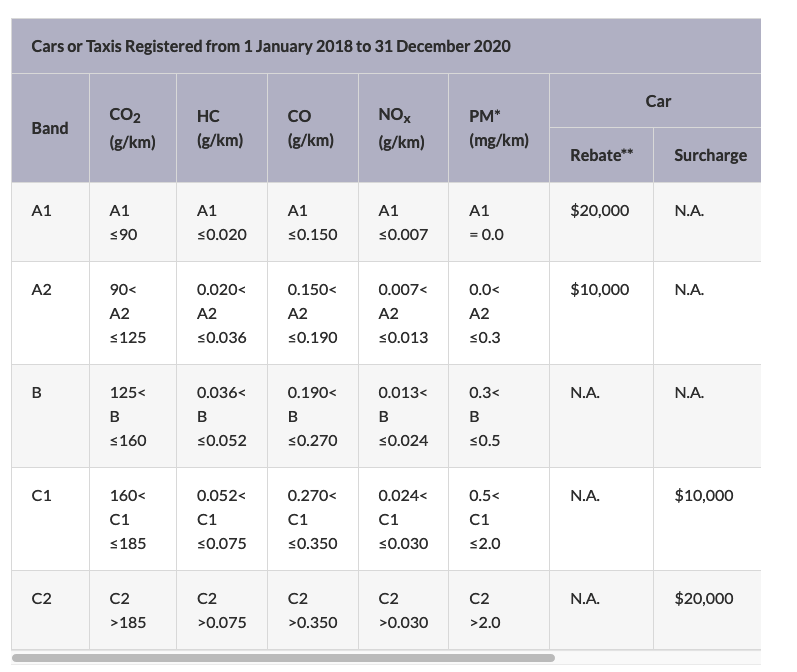
https://onemotoring.lta.gov.sg/content/onemotoring/home/buying/upfront-vehicle-costs/emissions-charges.html

In [180]:
#lowercase all str col. when we factorize/label encode if needed this will keep the keys consistent incase some rows were inconsistent in upper/lower
for col in dfmerged:
    if dfmerged[col].dtype == 'object':
        print(col)
        dfmerged[col] = dfmerged[col].astype(str).str.lower() 

Make
Model
Vehicle Class
Transmission
Fuel Type


In [181]:
#its all added to a backup pickle with the categorical col untouched - after this we will enumerate/label encode the categorical data
dfmerged.to_pickle("co2_emissions_cat.pkl")

In [290]:
save_cat_df = pd.read_pickle('co2_emissions_cat.pkl')

In [293]:
save_cat_df = save_cat_df[['Make', 'Vehicle Class', 'Engine Size_L', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions (g/km)', 'co2_bins']]

In [294]:
save_cat_df.columns = ['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission',
       'fuel_type', 'fuel_consumption_liters_100km', 'co2_emissions',
       'co2_bins']

In [297]:
save_cat_df.to_csv("co2_emissions.csv")

In [303]:
df_check = pd.read_csv("co2_emissions.csv")
df_check.head(1)

,make,vehicle_class,engine_liters,cylinders,transmission,fuel_type,fuel_consumption_liters_100km,co2_emissions,co2_bins
0,acura,suv: small,3.5,6,as9,z,10.8,252,"Surcharge of $20,000"


## 2.0 EDA

We will begin to get to know our data abit more here

In [ ]:
#read from pickle
df = pd.read_pickle('co2_emissions_cat.pkl')

### 2.1 Analyzing Categorical Values

In [159]:
#print # of unique values in Make feature, and list them out
print(df["Make"].nunique())
print(df["Make"].unique())

39
['acura' 'alfa romeo' 'aston martin' 'audi' 'bmw' 'buick' 'cadillac'
 'chevrolet' 'chrysler' 'dodge' 'fiat' 'ford' 'genesis' 'gmc' 'honda'
 'hyundai' 'infiniti' 'jaguar' 'jeep' 'kia' 'lamborghini' 'land rover'
 'lexus' 'lincoln' 'maserati' 'mazda' 'mercedes-benz' 'mini' 'mitsubishi'
 'nissan' 'porsche' 'ram' 'rolls-royce' 'subaru' 'toyota' 'volkswagen'
 'volvo' 'bentley' 'bugatti']


In [254]:
#check # of unique models
df.Model.nunique()

1114

In [255]:
#print # of unique values in Vehicle Class feature, and list them out
print(df["Vehicle Class"].nunique())
print(df["Vehicle Class"].unique()) 

15
['suv: small' 'two-seater' 'compact' 'mid-size' 'subcompact' 'minicompact'
 'station wagon: small' 'full-size' 'suv: standard' 'pickup truck: small'
 'pickup truck: standard' 'minivan' 'van: passenger'
 'special purpose vehicle' 'station wagon: mid-size']


In [256]:
#print # of unique values in Transmission feature, and list them out
print(df["Transmission"].nunique())
print(df["Transmission"].unique()) 

5
['Automatic with Select Shift' 'Automated Manual' 'Automatic' 'Manual'
 'Continuously Variable']


### 2.1.1 Mapping similar labels into a single label for Transmission column¶

In [183]:
# we used the names from our table_info.xlsx which was extracted from the original datasets

df["Transmission"] = np.where(df["Transmission"].isin(["a8", "a9", "a10", "a6", "a5", "a7", "a4"]), "Automatic", df["Transmission"])

df["Transmission"] = np.where(df["Transmission"].isin(["am9", "am8", "am6", "am7"]), "Automated Manual", df["Transmission"])

df["Transmission"] = np.where(df["Transmission"].isin(["as9", "as10", "as8", "as6", "as7", "as5"]), "Automatic with Select Shift", df["Transmission"])

df["Transmission"] = np.where(df["Transmission"].isin(["av", "av7", "av8", "av6", "av10", "av1"]), "Continuously Variable", df["Transmission"])

df["Transmission"] = np.where(df["Transmission"].isin(["m6", "m7", "m5"]), "Manual", df["Transmission"])

In [257]:
#check transmission feat col again
print(df["Transmission"].nunique())
print(df["Transmission"].unique()) 

5
['Automatic with Select Shift' 'Automated Manual' 'Automatic' 'Manual'
 'Continuously Variable']


### 2.1.2 Mapping labels into a meaningful label for Fuel Type column¶

In [184]:
#print # of unique values in Fuel Type feature, and list them out
print(df["Fuel Type"].nunique())
print(df["Fuel Type"].unique())

4
['z' 'x' 'd' 'e']


In [185]:
# we used the names from our table_info.xlsx which was extracted from the original datasets

df["Fuel Type"] = np.where(df["Fuel Type"]=="z", "Premium Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="x", "Regular Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="d", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="e", "Ethanol(E85)", df["Fuel Type"])

In [186]:
df["Fuel Type"].unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel', 'Ethanol(E85)'],
      dtype=object)

#Note: lowercasing in data cleaning was actually unneccesary as we manipulated the obj col categories into smaller bins

### 2.2.0 Summary of Feature Cols

1. There are unique 2339 entries


2. There are total 39 types of car Makes


3. There are total 1115 unique car Model. We will drop this column later on.


4. There are total 15 types of vehicle class basis on their gross vehicle weight rating (GVWR) and volume index. But there are no data available with exact GVWR or volume index value, in order to create bins for these classes


5. The 26 type of transmission has been clubed into 5 different transmission types


6. The 4 type of Fuel Types has been renamed so that it has some meaningful interpretation.

### 2.3.0 Identifying Correlations / Relationships

In [153]:
#identify correlation
df.corr()[['CO2 Emissions (g/km)']].sort_values(by='CO2 Emissions (g/km)', ascending=False)

,CO2 Emissions (g/km)
CO2 Emissions (g/km),1.000000
Fuel Consumption Comb (L/100 km),0.951656
Fuel Consumption City (L/100 km),0.948930
Fuel Consumption Hwy (L/100 km),0.917122
Engine Size_L,0.835887
Cylinders,0.834904
Smog Rating,-0.514353
Fuel Consumption Comb (mpg),-0.910652
CO2 Rating,-0.954422


<ipython-input-108-68c159a10a42>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap = 'Blues', square = True)


<AxesSubplot:>

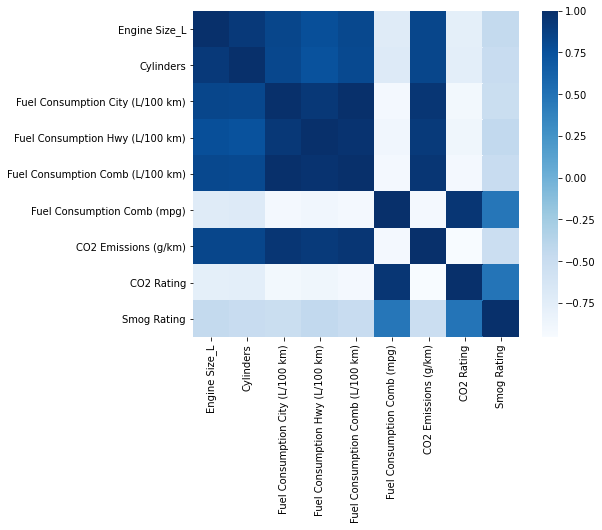

In [108]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap = 'Blues', square = True)

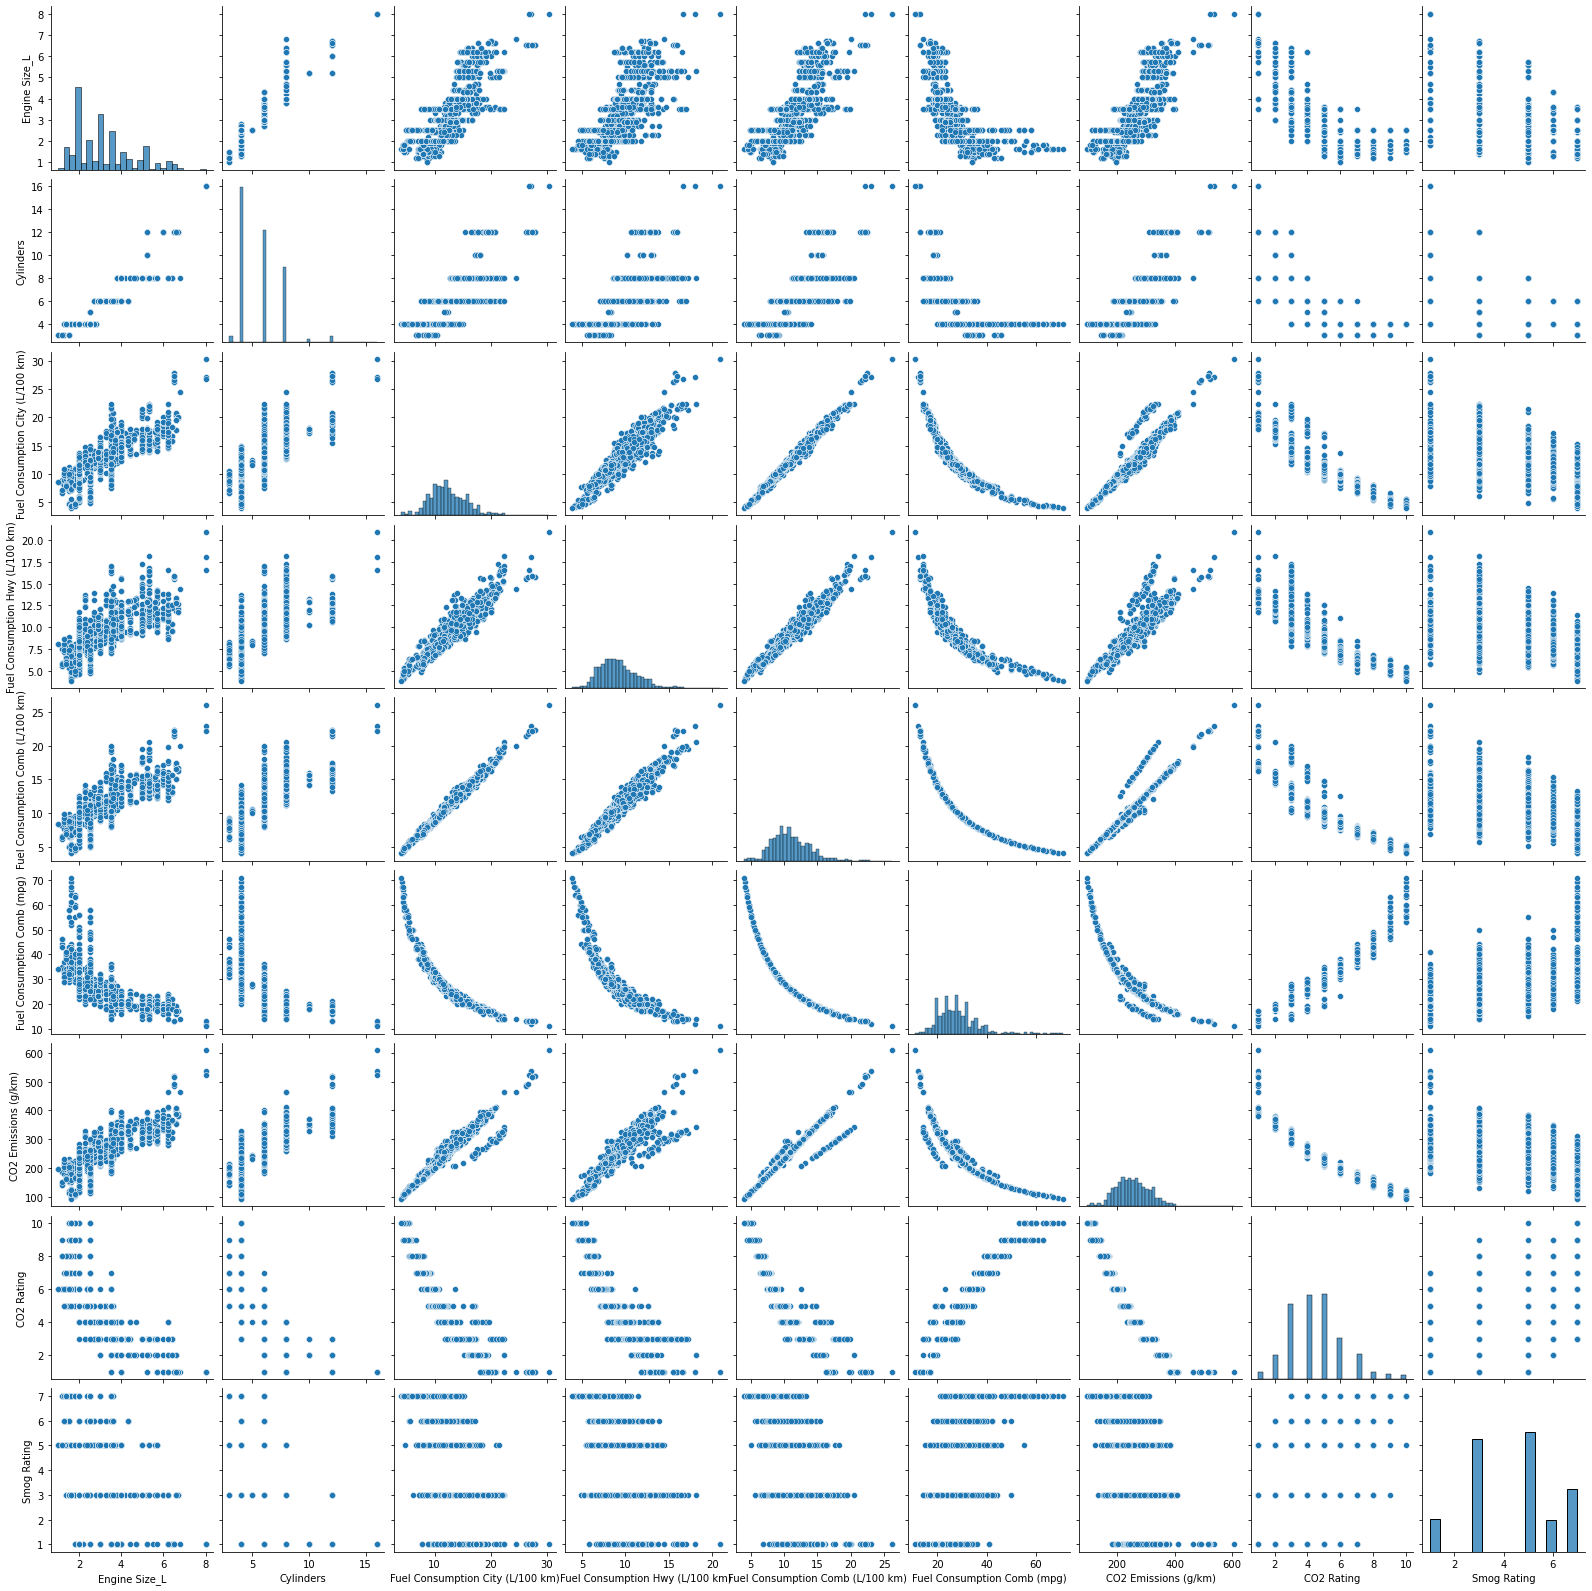

In [109]:
#pairplot to see frequency distribution and data viz correlation to see if there are any patterns
sns.pairplot(df)

Through the pairplot we identified a positive linear relationship between target variable "CO2 Emissions" and the following features:

- 'Engine Size_L' 

- 'Fuel Consumption City (L/100 km)'

- 'Fuel Consumption Hwy (L/100 km)'

- 'Fuel Consumption Comb (L/100 km)'

### 2.3.1 Scatterplot to show linear relationship between above 4 features identified and target 

In [130]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size_L', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)', 'CO2 Rating',
       'Smog Rating', 'co2_bins'],
      dtype='object')

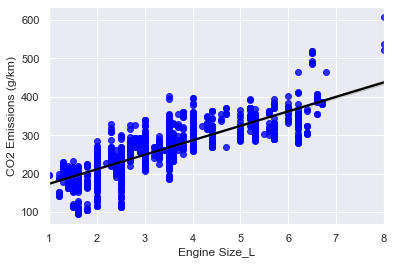

In [209]:
#linear relationship of Engine Size to CO2 Emissions
ax = sns.regplot(x='Engine Size_L', y='CO2 Emissions (g/km)', data=df, ci = 95, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

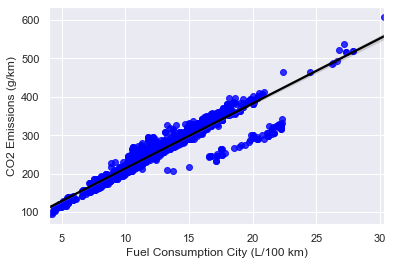

In [211]:
#linear relationship of 'Fuel Consumption City (L/100 km)' to CO2 Emissions
ax = sns.regplot(x='Fuel Consumption City (L/100 km)', y='CO2 Emissions (g/km)', data=df, ci = 95, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

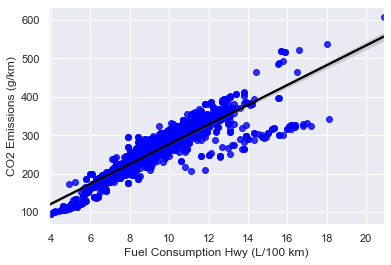

In [212]:
#linear relationship of 'Fuel Consumption Hwy (L/100 km)' to CO2 Emissions
ax = sns.regplot(x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions (g/km)', data=df, ci = 95, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

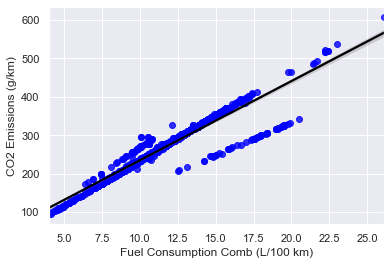

In [213]:
#linear relationship of 'Fuel Comb (L/100 km)' to CO2 Emissions
ax = sns.regplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions (g/km)', data=df, ci = 95, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

We should check to see if all 4 fuel consumption features are too correlated and drop the columns for the model

In [187]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size_L', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)', 'CO2 Rating',
       'Smog Rating', 'co2_bins'],
      dtype='object')

In [262]:
#make a correlation heatmap to see how closeley related the 3 "fuel" features are
df_fuel = df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']]

<ipython-input-263-4a141672c301>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(fuel_corr, mask=np.zeros_like(fuel_corr, dtype=np.bool), cmap = 'Blues',  annot=True, square = True)


<AxesSubplot:>

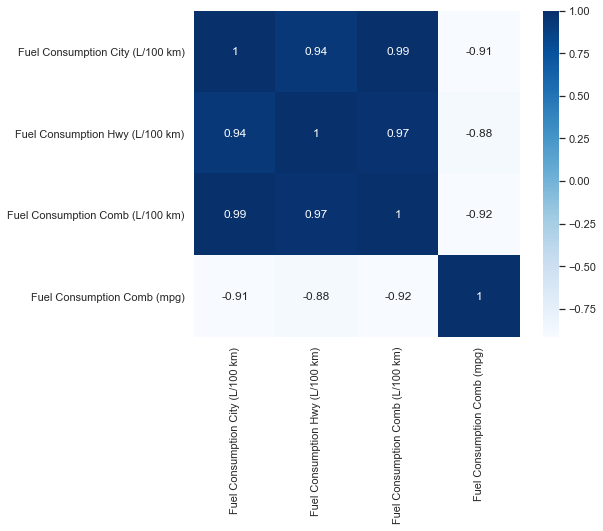

In [263]:
plt.figure(figsize = (8,6))
fuel_corr = df_fuel.corr()
sns.heatmap(fuel_corr, mask=np.zeros_like(fuel_corr, dtype=np.bool), cmap = 'Blues',  annot=True, square = True)

All 4 feature columns are highly positively/negatively correlated to each other. So we will have to keep 1 only, to reduce dimensionality

As we have seen that 'Fuel Comb (L/100 km)' to CO2 Emissions has the closest linear regression we will take that feature and drop the rest for the model

### 2.4.0 Visual EDA

/Users/lawrenceyim/opt/anaconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'ford'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'mercedes-benz'),
  Text(3, 0, 'bmw'),
  Text(4, 0, 'gmc'),
  Text(5, 0, 'porsche'),
  Text(6, 0, 'toyota'),
  Text(7, 0, 'audi'),
  Text(8, 0, 'honda'),
  Text(9, 0, 'hyundai'),
  Text(10, 0, 'nissan'),
  Text(11, 0, 'jeep'),
  Text(12, 0, 'mini'),
  Text(13, 0, 'kia'),
  Text(14, 0, 'volkswagen'),
  Text(15, 0, 'cadillac'),
  Text(16, 0, 'dodge'),
  Text(17, 0, 'lexus'),
  Text(18, 0, 'mazda'),
  Text(19, 0, 'jaguar'),
  Text(20, 0, 'subaru'),
  Text(21, 0, 'ram'),
  Text(22, 0, 'volvo'),
  Text(23, 0, 'maserati'),
  Text(24, 0, 'land rover'),
  Text(25, 0, 'lincoln'),
  Text(26, 0, 'buick'),
  Text(27, 0, 'lamborghini'),
  Text(28, 0, 'acura'),
  Text(29, 0, 'rolls-royce'),
  Text(30, 0, 'infiniti'),
  Text(31, 0, 'genesis'),
  Text(32, 0, 'be

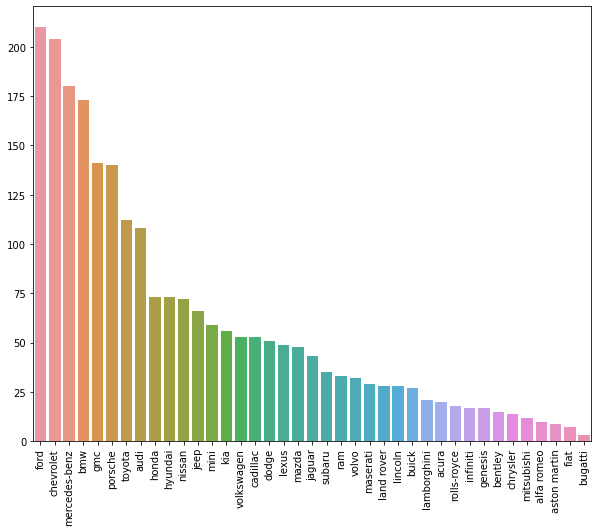

In [127]:
#identify distribution of car brands in the dataset
make_index = df['Make'].value_counts().index
make_values = df['Make'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(make_index,make_values)
plt.xticks(rotation='vertical')

/Users/lawrenceyim/opt/anaconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

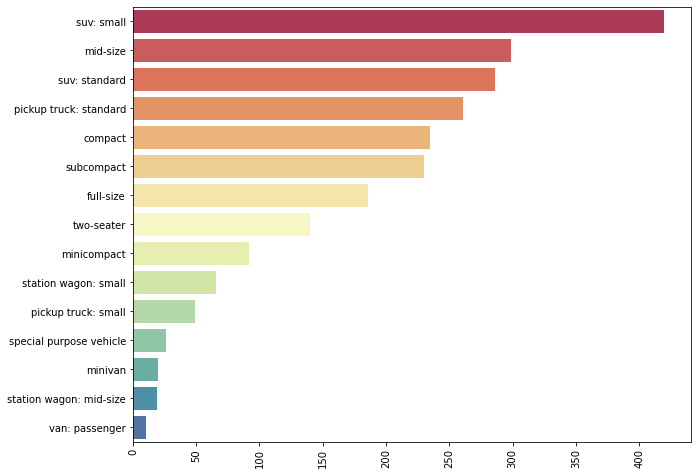

In [128]:
vehicle_index = df['Vehicle Class'].value_counts().index
vehicle_values = df['Vehicle Class'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(vehicle_values,vehicle_index, orient = 'h', palette='Spectral')
plt.xticks(rotation='vertical')

### 2.4.1 Comparing Features to CO2 Emissions (Target Variable)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'suv: small'),
  Text(1, 0, 'two-seater'),
  Text(2, 0, 'compact'),
  Text(3, 0, 'mid-size'),
  Text(4, 0, 'subcompact'),
  Text(5, 0, 'minicompact'),
  Text(6, 0, 'station wagon: small'),
  Text(7, 0, 'full-size'),
  Text(8, 0, 'suv: standard'),
  Text(9, 0, 'pickup truck: small'),
  Text(10, 0, 'pickup truck: standard'),
  Text(11, 0, 'minivan'),
  Text(12, 0, 'van: passenger'),
  Text(13, 0, 'special purpose vehicle'),
  Text(14, 0, 'station wagon: mid-size')])

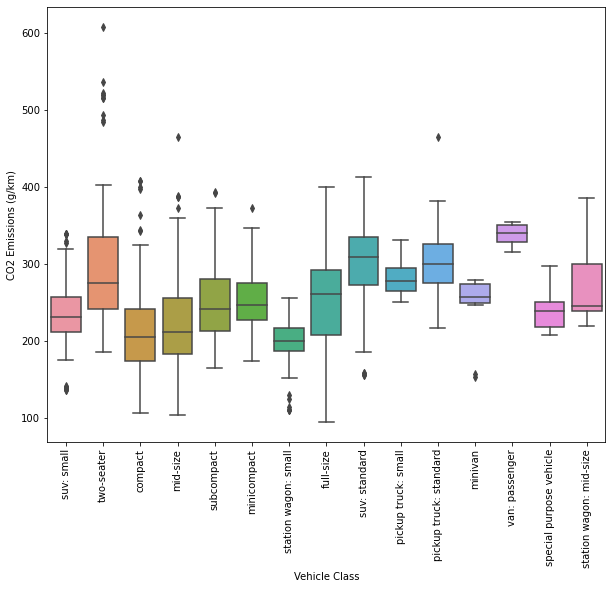

In [131]:
plt.figure(figsize = (10,8))
sns.boxplot(x="Vehicle Class", y="CO2 Emissions (g/km)", data=df)
plt.xticks(rotation = 'vertical')

2 Seater Cars have outliers with very high c02 emissions. these are probably sport cars, otherwise passenger vans have the highest median c02 emissions

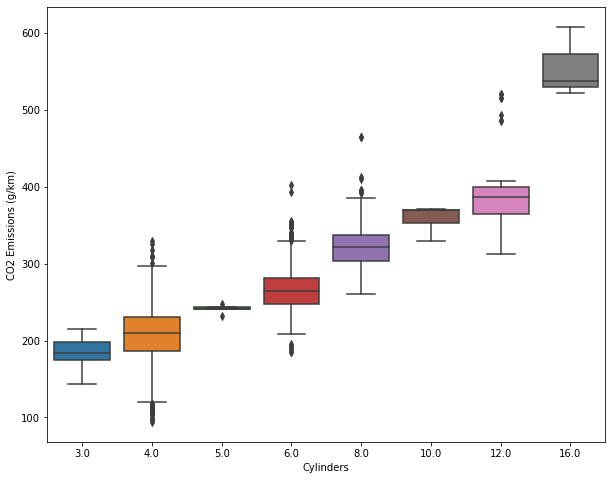

In [144]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Cylinders' , y = 'CO2 Emissions (g/km)', data = df)
plt.show()

Cars with more cylinders have higher co2 emmisions. Here we suspect they are sports cars. lets filter the data to find out

In [145]:
high_cylinder = df[df['Cylinders'].between(10.0, 16.0)]

In [147]:
print(high_cylinder.Make.value_counts())

lamborghini      20
rolls-royce      18
bentley           7
audi              6
aston martin      4
mercedes-benz     4
bugatti           3
bmw               2
Name: Make, dtype: int64

In [151]:
high_cylinder.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size_L', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

In [189]:
# complete df, 10 largest  values by target cO2 emissions
high_co2 = df.nlargest(10, ['CO2 Emissions (g/km)'])

In [190]:
high_co2.head(10)

,Make,Model,Vehicle Class,Engine Size_L,Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating,co2_bins
125,bugatti,chiron pur sport,two-seater,8.0,16.0,Automated Manual,Premium Gasoline,30.3,20.9,26.1,11.0,608.0,1.0,1.0,"Surcharge of $20,000"
146,bugatti,divo,two-seater,8.0,16.0,Automated Manual,Premium Gasoline,27.2,18.0,23.0,12.0,537.0,1.0,1.0,"Surcharge of $20,000"
124,bugatti,chiron,two-seater,8.0,16.0,Automated Manual,Premium Gasoline,26.8,16.6,22.2,13.0,522.0,1.0,1.0,"Surcharge of $20,000"
535,lamborghini,aventador coupe s,two-seater,6.5,12.0,Automated Manual,Premium Gasoline,27.9,15.7,22.4,13.0,520.0,1.0,1.0,"Surcharge of $20,000"
536,lamborghini,aventador coupe svj,two-seater,6.5,12.0,Automated Manual,Premium Gasoline,27.9,15.7,22.4,13.0,520.0,1.0,1.0,"Surcharge of $20,000"
537,lamborghini,aventador roadster s,two-seater,6.5,12.0,Automated Manual,Premium Gasoline,27.3,15.9,22.2,13.0,515.0,1.0,1.0,"Surcharge of $20,000"
538,lamborghini,aventador roadster svj,two-seater,6.5,12.0,Automated Manual,Premium Gasoline,27.3,15.9,22.2,13.0,515.0,1.0,1.0,"Surcharge of $20,000"
566,lamborghini,aventador roadster,two-seater,6.5,12.0,Automated Manual,Premium Gasoline,26.6,15.8,21.7,13.0,493.0,1.0,1.0,"Surcharge of $20,000"
593,lamborghini,aventador coupe,two-seater,6.5,12.0,Automated Manual,Premium Gasoline,26.3,15.6,21.5,13.0,487.0,1.0,1.0,"Surcharge of $20,000"
565,lamborghini,aventador coupe,two-seater,6.5,12.0,Automated Manual,Premium Gasoline,26.2,15.5,21.4,13.0,485.0,1.0,1.0,"Surcharge of $20,000"


All 10 largest petrol consumers were sports cars, using premium gasoline. These are probably the outliers

In [177]:
high_co2.Make.value_counts()

lamborghini    7
bugatti        3
Name: Make, dtype: int64

/Users/lawrenceyim/opt/anaconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2 Emissions (g/km)', ylabel='Density'>

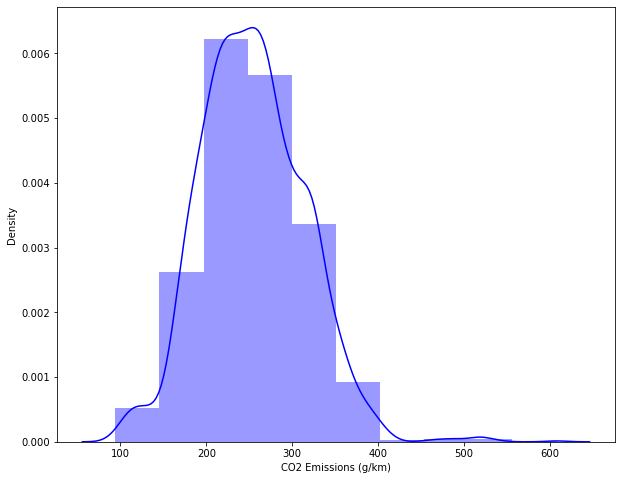

In [179]:
#Identifying distribution of target
plt.figure(figsize = (10,8))
sns.distplot(df['CO2 Emissions (g/km)'], bins = 10, color = 'blue')

In [183]:
#descriptive statistics of target
df.agg(
    {
        'CO2 Emissions (g/km)': ["min", "max", "median", "mean", "std", "skew"]
    }
)

,CO2 Emissions (g/km)
min,94.000000
max,608.000000
median,252.000000
mean,254.582300
std,60.485776
skew,0.435965


### 2.4.2 Comparing Features to Fuel Consumption (mpg aka Miles Per Gallon)

Identifying if there are links between features and fuel consumption (a known cause of co2 emissions)

/Users/lawrenceyim/opt/anaconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


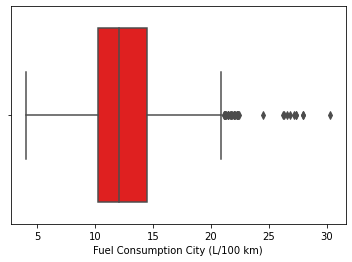

/Users/lawrenceyim/opt/anaconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


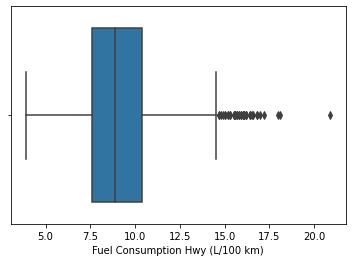

/Users/lawrenceyim/opt/anaconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


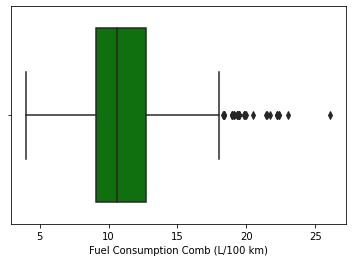

In [132]:
sns.boxplot(df['Fuel Consumption City (L/100 km)'], color = "red")
plt.show()
sns.boxplot(df['Fuel Consumption Hwy (L/100 km)'])
plt.show()
sns.boxplot(df['Fuel Consumption Comb (L/100 km)'], color = 'green')
plt.show()

In [133]:
df['Fuel Type'].value_counts()

Premium Gasoline    1119
Regular Gasoline    1092
Diesel                65
Ethanol(E85)          63
Name: Fuel Type, dtype: int64

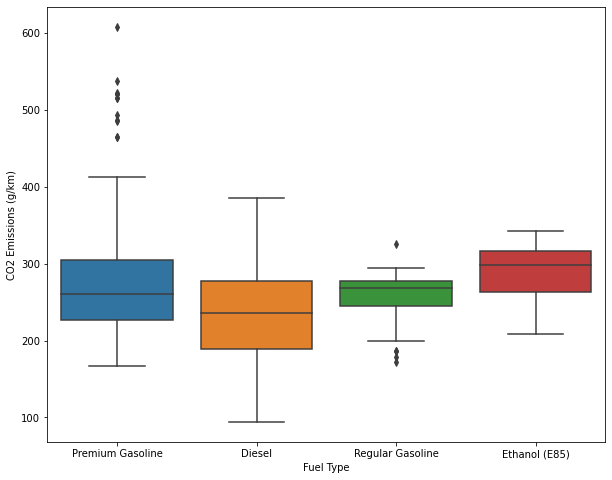

In [136]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Fuel Type' , y = 'CO2 Emissions (g/km)', data = df)
plt.xticks([0,1,2,3],['Premium Gasoline','Diesel','Regular Gasoline','Ethanol (E85)'])
plt.show()

Premium gasoline had the largest range of emissions, however biofuels like ethanol actually had higher median cO2 emissions

([<matplotlib.axis.XTick at 0x7fda1801a700>,
 [Text(0, 0, 'Premium Gasoline'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Regular Gasoline'),
  Text(3, 0, 'Ethanol (E85)')])

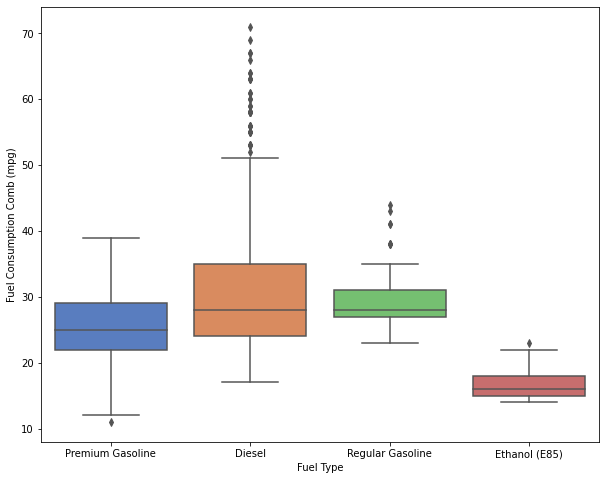

In [140]:
plt.figure(figsize = (10,8))
sns.boxplot(y = 'Fuel Consumption Comb (mpg)', x = 'Fuel Type', data = df, palette = 'muted')
plt.xticks([0,1,2,3],['Premium Gasoline','Diesel','Regular Gasoline','Ethanol (E85)'])

Fuel consumption in miles per gallon was most efficient in Ethanol. However Ethanol has the highest median cO2 as shown in above boxplot

/Users/lawrenceyim/opt/anaconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fuel Consumption Comb (mpg)', ylabel='Density'>

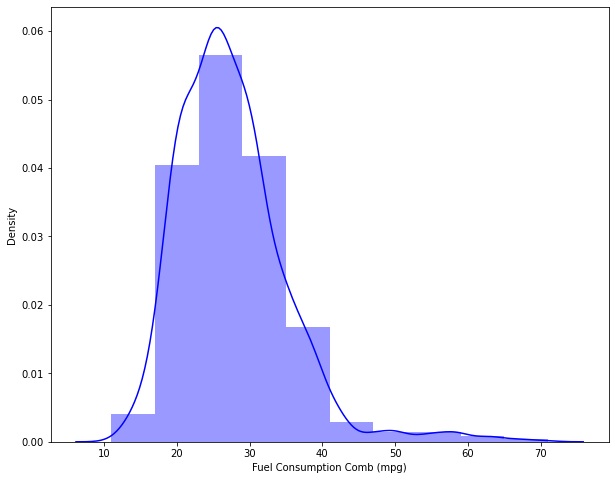

In [185]:
#Identifying distribution of fuel consumption
plt.figure(figsize = (10,8))
sns.distplot(df['Fuel Consumption Comb (mpg)'], bins = 10, color = 'blue')

In [187]:
#descriptive statistics of Fuel Consumption
df.agg(
    {
        'Fuel Consumption Comb (mpg)': ["min", "max", "median", "mean", "std", "skew"]
    }
)

,Fuel Consumption Comb (mpg)
min,11.000000
max,71.000000
median,27.000000
mean,27.537409
std,7.635894
skew,1.459480


### 2.5.0 Descriptive statistics to learn abit more about our data

In [191]:
df.describe()

,Engine Size_L,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000
mean,3.146302,5.650278,12.429158,9.169602,10.960539,27.537409,254.582300,4.477127,4.441642
std,1.342360,1.873219,3.393527,2.155744,2.796519,7.635894,60.485776,1.674486,1.787322
min,1.000000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.200000,7.600000,9.100000,22.000000,213.000000,3.000000,3.000000
50%,3.000000,6.000000,12.000000,8.900000,10.600000,27.000000,252.000000,4.000000,5.000000
75%,3.800000,6.000000,14.500000,10.400000,12.700000,31.000000,294.000000,5.000000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


## 3.0 Feature Selection

In [155]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size_L', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)', 'CO2 Rating',
       'Smog Rating', 'co2_bins'],
      dtype='object')

In [193]:
#First we should drop columns that arent needed in the model, or are potentially derived from the target
cols_of_interest = ['Make', 'Vehicle Class', 'Engine Size_L', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions (g/km)', 'co2_bins']
df = df[cols_of_interest]

Label Encoder For Obj Columns

In [194]:
df.dtypes

Make                                  object
Vehicle Class                         object
Engine Size_L                        float64
Cylinders                            float64
Transmission                          object
Fuel Type                             object
Fuel Consumption Comb (L/100 km)     float64
CO2 Emissions (g/km)                 float64
co2_bins                            category
dtype: object

In [195]:
#convert c02_bins to str
df['co2_bins'] = df.co2_bins.astype(str)

In [196]:
#here we encode all object columns using factorize and store them into a dict so we can analyze the data for the regression model
df_dict = {}
for col in df:
    if df[col].dtype == 'object':
        key, value = pd.factorize(df[col]) 
        temp = dict(zip(list(set(key)),list(value)))
        df_dict[col] = temp
        df[col] = key

In [197]:
#print here so we can save to an external txt file called dictionary.txt
df_dict

{'Make': {0: 'acura',
  1: 'alfa romeo',
  2: 'aston martin',
  3: 'audi',
  4: 'bmw',
  5: 'buick',
  6: 'cadillac',
  7: 'chevrolet',
  8: 'chrysler',
  9: 'dodge',
  10: 'fiat',
  11: 'ford',
  12: 'genesis',
  13: 'gmc',
  14: 'honda',
  15: 'hyundai',
  16: 'infiniti',
  17: 'jaguar',
  18: 'jeep',
  19: 'kia',
  20: 'lamborghini',
  21: 'land rover',
  22: 'lexus',
  23: 'lincoln',
  24: 'maserati',
  25: 'mazda',
  26: 'mercedes-benz',
  27: 'mini',
  28: 'mitsubishi',
  29: 'nissan',
  30: 'porsche',
  31: 'ram',
  32: 'rolls-royce',
  33: 'subaru',
  34: 'toyota',
  35: 'volkswagen',
  36: 'volvo',
  37: 'bentley',
  38: 'bugatti'},
 'Vehicle Class': {0: 'suv: small',
  1: 'two-seater',
  2: 'compact',
  3: 'mid-size',
  4: 'subcompact',
  5: 'minicompact',
  6: 'station wagon: small',
  7: 'full-size',
  8: 'suv: standard',
  9: 'pickup truck: small',
  10: 'pickup truck: standard',
  11: 'minivan',
  12: 'van: passenger',
  13: 'special purpose vehicle',
  14: 'station wagon

In [198]:
#save to csv as well as a backup as well

import csv

a_file = open("factorize_keys.csv", "w")

#a_dict = {"a": 1, "b": 2}
writer = csv.writer(a_file)
for key, value in df_dict.items():
    writer.writerow([key, value])

a_file.close()

In [199]:
df.columns

Index(['Make', 'Vehicle Class', 'Engine Size_L', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions (g/km)',
       'co2_bins'],
      dtype='object')

In [200]:
#here we will rename cols that will be easier to type out for our models, feature names wont have spaces
col_names= ['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_liters_100km', 'co2_emissions', 'co2_bins']
df.columns = col_names

In [201]:
#saved to pickle here after its been encoded
df.to_pickle("co2_emissions_encoded.pkl")

In [255]:
df.to_csv("co2_emissions_encoded.csv")

### 3.1.0 Find and Highly Correlated Features

In [3]:
df = pd.read_pickle('co2_emissions_encoded.pkl')

In [4]:
df.head(1)

,make,vehicle_class,engine_liters,cylinders,transmission,fuel_type,fuel_consumption_liters_100km,co2_emissions,co2_bins
2,0,0,3.5,6.0,0,0,10.8,252.0,0


In [10]:
df.fuel_type.max()

3

In [73]:
#Set predictors and target
X = df[['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_liters_100km']]
y = df[['co2_emissions']]           

In [74]:
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [289]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features #: ', len(set(corr_features)) )
print('correlated features : ', set(corr_features)) 

correlated features #:  3
correlated features :  {'co2_emissions', 'cylinders', 'fuel_consumption_liters_100km'}


<ipython-input-36-24211220fccb>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_rf, y_train_rf)


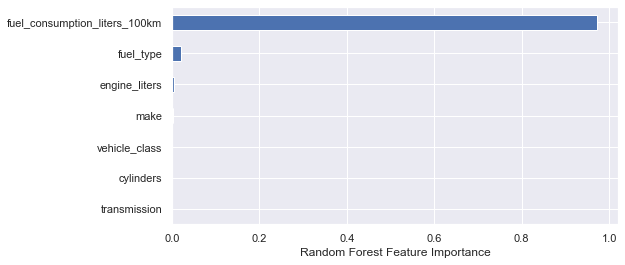

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#price psqft not used here since it was imputed from the target variable
X_rf = df[['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_liters_100km']]
y_rf = df[['co2_emissions']]  

#split to train test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, stratify=None, random_state=42)

#randomforestregressor used as it can handle continuous data for Y https://stackoverflow.com/questions/47942417/valueerror-unknown-label-type-continuous-when-applying-random-forrest
#lets give it 100 decision trees with out of bag score true
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42) #oob score is true so in future when we want we can validate the model. we use oob score vs validate score of the model to see how representative our dataset is https://stats.stackexchange.com/questions/95818/what-is-a-good-oob-score-for-random-forests-with-sklearn-three-class-classifica/168643
rf.fit(X_train_rf, y_train_rf)

#gets array of feature importance
rf.feature_importances_

#lets look at the features in a barchart, as its easier to understand if the array is visualized
features = pd.Series(rf.feature_importances_, index=X_rf.columns)
feature_list = features.sort_values(ascending=False).index.to_list()
features.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")
plt.show()

## 4.0 Machine Learning Models - Comparison On Supervised Learning Models

### 4.0.1 Establish baseline score with kfold cross validation

In [76]:
#Set predictors and target
X = df[['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_liters_100km']]
y = df[['co2_emissions']]    
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

regr = LinearRegression()
#regr2 = linear_model.LinearRegression()
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True, random_state=42)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    # Get training and test sets for X and y 
    X_train=X.iloc[train]
    X_test=X.iloc[test]
    y_train=y.iloc[train]
    y_test=y.iloc[test]
    
    # Fit model with training set
    y_pred_train = regr.fit(X_train, y_train).predict(X_train)
    y_pred_test = regr.fit(X_test, y_test).predict(X_test)
    # Make predictions with training and test set
    # Score R2 and RMSE on training and test sets and store in list           
    train_scores.append(r2_score(y_train, y_pred_train))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_scores.append(r2_score(y_test, y_pred_test))
    test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = {}
metrics_df['train_scores'] = train_scores
metrics_df['train_rmse'] = train_rmse
metrics_df['test_scores'] = test_scores
metrics_df['test_rmse'] = test_rmse
metrics_df = pd.DataFrame.from_dict(metrics_df)
# Describe the metrics
metrics_df.describe()

,train_scores,train_rmse,test_scores,test_rmse
count,5.000000,5.000000,5.000000,5.000000
mean,0.935079,15.403549,0.936836,15.116684
std,0.002448,0.226038,0.010549,0.937967
min,0.932421,15.107585,0.919818,13.781613
25%,0.933777,15.298040,0.935213,14.804417
50%,0.934860,15.433028,0.940042,15.061155
75%,0.935376,15.456149,0.941128,15.662960
max,0.938962,15.722940,0.947978,16.273276


### 4.1.0 Simple Linear Regression

Source: https://machinelearningmastery.com/feature-selection-for-regression-data/

### 4.1.1 Feature Selection For Numeric Input With based on chi2(K) best score / Pearson Correlation

For example, we can define the SelectKBest class to use the f_regression() function and select all features, then transform the train and test sets.
We can then print the scores for each variable (largest is better) and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

/Users/lawrenceyim/opt/anaconda3/envs/regression/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 26.776622
Feature 1: 211.764905
Feature 2: 3688.201111
Feature 3: 3661.451723
Feature 4: 95.965626
Feature 5: 24.166806
Feature 6: 13014.790643


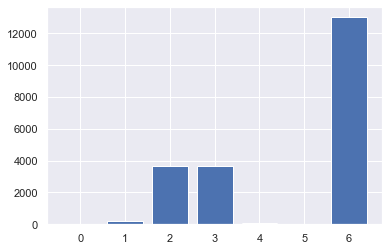

In [299]:
#Set predictors and target
X = df[['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_liters_100km']]
y = df[['co2_emissions']]    
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Features Fuel Consumption, followed by Cylinders, followed by Engine Liters were the best predictors in descending order

For the Simple Linear Regression, we will use Fuel Consumption Only

### 4.1.1 Simple Linear Regression with Fuel Consumption Only (Not Scaled)

In [4]:
df.columns

Index(['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission',
       'fuel_type', 'fuel_consumption_liters_100km', 'co2_emissions'],
      dtype='object')

In [5]:
#Set predictors and target
X = df[['fuel_consumption_liters_100km']]
y = df.co2_emissions

In [7]:
# split into training_test datasets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#define model
slr = LinearRegression()

#fit and train model
slr.fit(X_train, y_train)

#apply trained model to make prediction on test set
pred = slr.predict(X_test)

# The coefficients
print('Coefficients: \n', slr.coef_)
#print model performance
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, pred))
print('Root Mean squared error (RMSE): %.2f'
      % np.sqrt(mean_squared_error(y_test, pred)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, pred))

Coefficients: 
 [20.80008267]
Mean squared error (MSE): 444.17
Root Mean squared error (RMSE): 21.08
Coefficient of determination (R^2): 0.87


In [8]:
print(' This linear regression models RMSE is '+ str(round(21.08/ df['co2_emissions'].mean(),2)*100) + '% from the mean of CO2 Emissions (g/km)')

 This linear regression models RMSE is 8.0% from the mean of CO2 Emissions (g/km)


In [254]:
df.columns

Index(['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission',
       'fuel_type', 'fuel_consumption_liters_100km', 'co2_emissions',
       'co2_bins'],
      dtype='object')

In [345]:
#we then place the predictions into a dataframe so we can plot and do some descriptive stats
slr_predictions_df = pd.DataFrame(data=pred)

                0
count  468.000000
mean   251.767814
std     56.842165
min    112.216148
25%    214.136553
50%    245.336677
75%    289.016851
max    432.537421


(array([ 11.,  10.,  82., 117.,  99.,  60.,  55.,  18.,   9.,   7.]),
 array([112.21614803, 144.24827535, 176.28040266, 208.31252998,
        240.34465729, 272.3767846 , 304.40891192, 336.44103923,
        368.47316654, 400.50529386, 432.53742117]),
 <BarContainer object of 10 artists>)

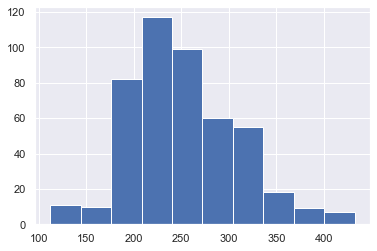

In [346]:
#now we will have descriptive stats on predictions and plot  a histpgram to see distribution of predictions
print(slr_predictions_df.describe())
plt.hist(slr_predictions_df)

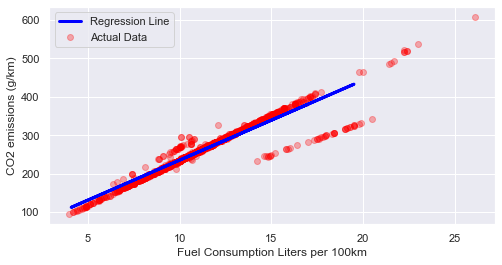

In [14]:
# let's visualize our results
plt.rcParams['figure.figsize'] = 8, 4
plt.plot(X_test, pred, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_train, y_train, c='red', label='Actual Data', alpha=0.3)

plt.xlabel('Fuel Consumption Liters per 100km')
plt.ylabel("CO2 emissions (g/km)")
plt.legend()
plt.show()

In [10]:
#Actual value and the predicted values
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred})
slr_diff.head()

,Actual value,Predicted value
945,397.0,380.537214
740,174.0,182.936429
539,313.0,303.576909
647,285.0,278.616809
329,308.0,299.416892


In [15]:
df.head(1)

,make,vehicle_class,engine_liters,cylinders,transmission,fuel_type,fuel_consumption_liters_100km,co2_emissions
2,0,0,3.5,6.0,0,0,10.8,252.0


In [16]:
#test model prediction for new data when fuel consumption is 10.8L per 100km comb
slr.predict([[10.8]])

array([251.57670193])

### 4.2.0 Simple Linear Regression (Scaled With StandardScaler)

In [81]:
X = df[["fuel_consumption_liters_100km"]]
y = df.co2_emissions
#split to train,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sc = StandardScaler()
scaler = sc.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaled_slr = LinearRegression()

# Train the model using the training sets
scaled_slr.fit(X_train, y_train)


# Make predictions using the testing set
scaled_slr_pred = scaled_slr.predict(X_test)

# The coefficients
print('Coefficients: \n', scaled_slr.coef_)
#print model performance
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, scaled_slr_pred))
print('Root Mean squared error (RMSE): %.2f'
      % np.sqrt(mean_squared_error(y_test, scaled_slr_pred)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, scaled_slr_pred))

Coefficients: 
 [58.46752003]
Mean squared error (MSE): 444.17
Root Mean squared error (RMSE): 21.08
Coefficient of determination (R^2): 0.87


In [39]:
df.head(1)

,make,vehicle_class,engine_liters,cylinders,transmission,fuel_type,fuel_consumption_liters_100km,co2_emissions
2,0,0,3.5,6.0,0,0,10.8,252.0


In [40]:
#testing model prediction with new data
new_data = [[10.8]]
new_data_scaled = scaler.transform(new_data)
scaled_slr.predict(new_data_scaled)

array([251.57670193])

Result is same as data before scaling

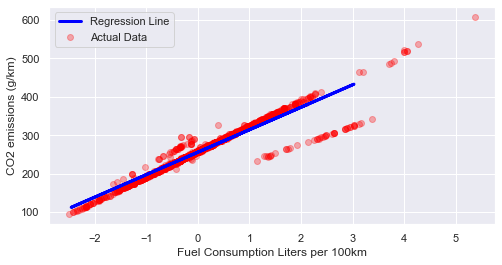

In [20]:
# let's visualize our results
plt.rcParams['figure.figsize'] = 8, 4
plt.plot(X_test, scaled_slr_pred, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X_train, y_train, c='red', label='Actual Data', alpha=0.3)

plt.xlabel('Fuel Consumption Liters per 100km')
plt.ylabel("CO2 emissions (g/km)")
plt.legend()
plt.show()

In [31]:
#Actual value and the predicted values
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': scaled_slr_pred})
slr_diff.head()

,Actual value,Predicted value
945,397.0,380.537214
740,174.0,182.936429
539,313.0,303.576909
647,285.0,278.616809
329,308.0,299.416892


### 4.3.0 Multi Linear Regression With Feature Selection Using RandomForest (Not Scaled)

In [340]:
#set target and predictors
X = df[['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_liters_100km']]
y = df[['co2_emissions']]

#split train test test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, stratify=None, random_state=42)

Random Forest Regression

Random forest is an ensemble of decision trees. This is to say that many trees, constructed in a certain “random” way form a Random Forest. 

- Each tree is created from a different sample of rows and at each node, a different sample of features is selected for splitting. 

- Each of the trees makes its own individual prediction. 

- These predictions are then averaged to produce a single result. 



In [347]:
#randomforestregressor used as it can handle continuous data for Y https://stackoverflow.com/questions/47942417/valueerror-unknown-label-type-continuous-when-applying-random-forrest
#lets give it 100 decision trees with out of bag score true
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42) #oob score is true so in future when we want we can validate the model. we use oob score vs validate score of the model to see how representative our dataset is https://stats.stackexchange.com/questions/95818/what-is-a-good-oob-score-for-random-forests-with-sklearn-three-class-classifica/168643
rf.fit(X_train_rf, y_train_rf)

<ipython-input-347-ce1e99920c81>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_rf, y_train_rf)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [348]:
#gets array of feature importance
rf.feature_importances_

array([1.76148274e-03, 4.76815654e-04, 3.67815010e-03, 2.26802896e-04,
       1.81857492e-04, 2.09889357e-02, 9.72685955e-01])

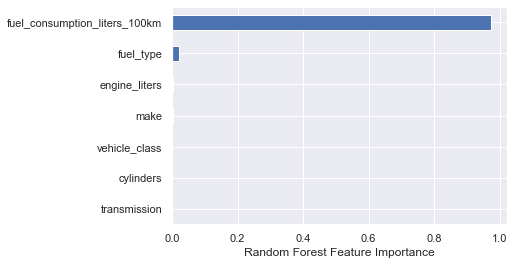

In [350]:
#lets look at the features in a barchart, as its easier to understand if the array is visualized
features = pd.Series(rf.feature_importances_, index=X.columns)
feature_list = features.sort_values(ascending=False).index.to_list()
features.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")
plt.show()

random forest is showing that the only important features are fuel consumption, and to a lesser extent fuel type.

We will then create a multi linear model with all features, instead of using random forest to pick features

In [41]:
#set target and predictors
X = df[['fuel_type', 'fuel_consumption_liters_100km']]
y = df[['co2_emissions']]

#split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#define model
mlr = LinearRegression()

#fit and train model
mlr.fit(X_train, y_train)

#apply trained model to make prediction on test set
multi_pred = mlr.predict(X_test)

#print model performance
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, multi_pred))
print('Root Mean squared error (RMSE): %.2f'
      % np.sqrt(mean_squared_error(y_test, multi_pred)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, multi_pred))

Mean squared error (MSE): 317.37
Root Mean squared error (RMSE): 17.81
Coefficient of determination (R^2): 0.90


In [51]:
#test with new data to see how similar the model prediction is
print(X.tail(5))
print('===')
print(y.tail(5))
print(mlr.predict([[1,9.3]]))
print(mlr.predict([[0,9.4]]))
print(mlr.predict([[0,9.9]]))
print(mlr.predict([[0,10.3]]))
print(mlr.predict([[0,10.1]]))

     fuel_type  fuel_consumption_liters_100km
912          1                            9.3
913          0                            9.4
914          0                            9.9
915          0                           10.3
916          0                           10.1
===
     co2_emissions
912          217.0
913          219.0
914          230.0
915          240.0
916          236.0
[[215.23891629]]
[[229.91901487]]
[[240.31478299]]
[[248.63139749]]
[[244.47309024]]


r2 improved with addition of a new feature

### Multi Linear Regression Model With All Features (Not Scaled, All Features)

In [250]:
#set target and predictors
X = df[['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_liters_100km']]
y = df[['co2_emissions']]

#split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#define model
mlr = LinearRegression()

#fit and train model
mlr.fit(X_train, y_train)

#apply trained model to make prediction on test set
multi_pred = mlr.predict(X_test)

#print model performance
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, multi_pred))
print('Root Mean squared error (RMSE): %.2f'
      % np.sqrt(mean_squared_error(y_test, multi_pred)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, multi_pred))

Mean squared error (MSE): 279.38
Root Mean squared error (RMSE): 16.71
Coefficient of determination (R^2): 0.92


In [251]:
df.sample(1, random_state=42)

,make,vehicle_class,engine_liters,cylinders,transmission,fuel_type,fuel_consumption_liters_100km,co2_emissions,co2_bins
945,32,7,6.6,12.0,0,0,17.0,397.0,0


In [252]:

mlr.predict([[32,7,6.5,12.0,0,0,17.0]])

array([[395.35851906]])

In [385]:
print(' This multi linear regression models RMSE is '+ str(round(16.71/ df['co2_emissions'].mean(),2)*100) + '% from the mean of CO2 Emissions (g/km)')

 This multi linear regression models RMSE is 7.000000000000001% from the mean of CO2 Emissions (g/km)


                0
count  468.000000
mean   250.762874
std     56.920090
min    117.427755
25%    213.016314
50%    244.030079
75%    288.699616
max    395.751415


(array([11., 13., 67., 89., 98., 64., 45., 48., 23., 10.]),
 array([117.42775503, 145.26012104, 173.09248705, 200.92485306,
        228.75721907, 256.58958508, 284.42195109, 312.2543171 ,
        340.08668311, 367.91904912, 395.75141513]),
 <BarContainer object of 10 artists>)

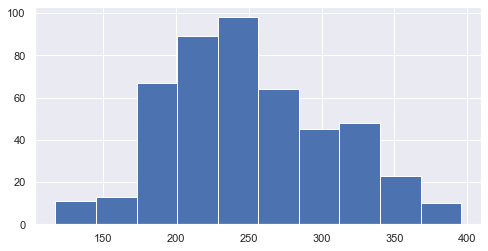

In [386]:
#we then place the predictions into a dataframe so we can plot and do some descriptive stats
mlr_predictions_df = pd.DataFrame(data=multi_pred)
#now we will have descriptive stats on predictions and plot  a histpgram to see distribution of predictions
print(mlr_predictions_df.describe())
plt.hist(mlr_predictions_df)

In [253]:
#we dump the model into a pickle to be opened with streamlit
pickle.dump(mlr,open('multi_linear.pkl','wb'))

### 4.4.0 Multi Linear Regression Model With All Features (Scaled)

In [244]:
X = df[['make', 'vehicle_class', 'engine_liters', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_liters_100km']]
y = df.co2_emissions
#split to train,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sc = StandardScaler()
scaler = sc.fit(X_train)
X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

scaled_mlr = LinearRegression()

# Train the model using the training sets
scaled_mlr.fit(X_train, y_train)


# Make predictions using the testing set
scaled_mlr_pred = scaled_mlr.predict(sc.transform(X_test))

# The coefficients
print('Coefficients: \n', scaled_mlr.coef_)
#print model performance
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, scaled_mlr_pred))
print('Root Mean squared error (RMSE): %.2f'
      % np.sqrt(mean_squared_error(y_test, scaled_mlr_pred)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, scaled_mlr_pred))

Coefficients: 
 [-0.13240513  1.7262186   5.30282218  2.67581464  0.06455955 -8.15689418
 51.25658013]
Mean squared error (MSE): 279.38
Root Mean squared error (RMSE): 16.71
Coefficient of determination (R^2): 0.92


Result and accuracy metrics are exactly the same as not scaled data.